In [1]:
from tensorflow.keras.models import Sequential
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPool2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import load_model
import seaborn as sns

In [2]:
!unzip "/content/RGB.zip" -d "/content/RGB/"

Archive:  /content/RGB.zip
   creating: /content/RGB/RGB/test/
   creating: /content/RGB/RGB/test/Humidity_Autumn/
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB47.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB48.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB49.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB50.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB51.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB52.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB53.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB54.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB55.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB56.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB57.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB58.png  
  inflating: /content

In [3]:
path_train = '/content/RGB/RGB/train'
path_test = '/content/RGB/RGB/test'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path_train, target_size=(224,224), class_mode='categorical', color_mode='grayscale')
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(224,224), class_mode='categorical', color_mode='grayscale')

Found 786 images belonging to 12 classes.
Found 239 images belonging to 12 classes.


In [4]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(12,activation='softmax'))

In [5]:
#compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
# fit the model
history_cnn_medical = model.fit(
  train,
  validation_data=test,
  epochs=100
)    

model.save('seasons_cnn_model.h5')

Epoch 1/100
25/25 [==============================] - 22s 486ms/step - loss: 17.5660 - accuracy: 0.0980 - val_loss: 4.5395 - val_accuracy: 0.0795
Epoch 2/100
25/25 [==============================] - 16s 640ms/step - loss: 3.2999 - accuracy: 0.0814 - val_loss: 2.5978 - val_accuracy: 0.0837
Epoch 3/100
25/25 [==============================] - 22s 873ms/step - loss: 2.5513 - accuracy: 0.0891 - val_loss: 2.5016 - val_accuracy: 0.0962
Epoch 4/100
25/25 [==============================] - 16s 602ms/step - loss: 2.4822 - accuracy: 0.0916 - val_loss: 2.5686 - val_accuracy: 0.0837
Epoch 5/100
25/25 [==============================] - 12s 487ms/step - loss: 2.4839 - accuracy: 0.0903 - val_loss: 2.5150 - val_accuracy: 0.0879
Epoch 6/100
25/25 [==============================] - 12s 480ms/step - loss: 2.4849 - accuracy: 0.0916 - val_loss: 2.5023 - val_accuracy: 0.0795
Epoch 7/100
25/25 [==============================] - 12s 466ms/step - loss: 2.4827 - accuracy: 0.1018 - val_loss: 2.4853 - val_accuracy

In [7]:
#Loading Model
test_model= load_model('seasons_cnn_model.h5')

In [8]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_data_generator = test_generator.flow_from_directory(
    path_test,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
    color_mode='grayscale')
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


Found 239 images belonging to 12 classes.


In [9]:
Y_preds = test_model.predict(test_data_generator, steps=test_steps_per_epoch)

8/8 [==============================] - 2s 285ms/step


In [10]:
# Get most likely class
predicted_classes = np.argmax(Y_preds, axis=1)

print(test_data_generator.classes)
print(predicted_classes)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11]
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 

In [11]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())


In [12]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cmat = confusion_matrix(true_classes, predicted_classes)
acc = accuracy_score(true_classes, predicted_classes)
print(report) 
print(cmat)
print(acc)

                    precision    recall  f1-score   support

   Humidity_Autumn       0.00      0.00      0.00        20
   Humidity_Spring       0.00      0.00      0.00        20
   Humidity_Summer       0.00      0.00      0.00        19
   Humidity_Winter       0.00      0.00      0.00        20
   Moisture_Autumn       0.00      0.00      0.00        20
   Moisture_Spring       0.00      0.00      0.00        20
   Moisture_Summer       0.08      1.00      0.15        20
   Moisture_Winter       0.00      0.00      0.00        20
Temperature_Autumn       0.00      0.00      0.00        20
Temperature_Spring       0.00      0.00      0.00        20
Temperature_Summer       0.00      0.00      0.00        20
Temperature_Winter       0.00      0.00      0.00        20

          accuracy                           0.08       239
         macro avg       0.01      0.08      0.01       239
      weighted avg       0.01      0.08      0.01       239

[[ 0  0  0  0  0  0 20  0  0  0  0  0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


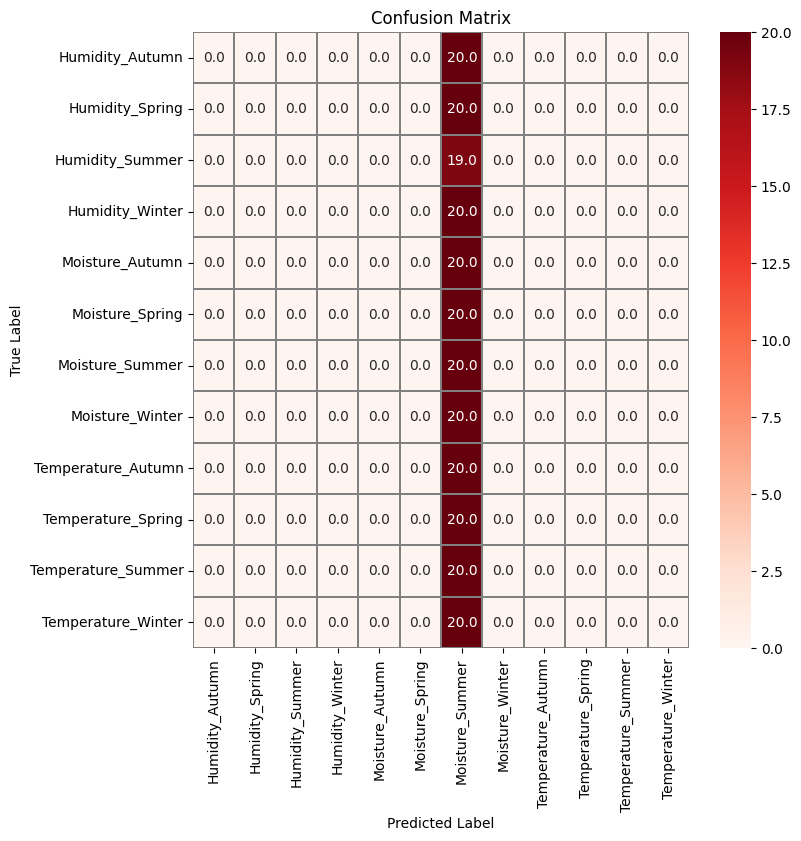

In [13]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Reds",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.set_xticklabels(['Humidity_Autumn','Humidity_Spring','Humidity_Summer','Humidity_Winter','Moisture_Autumn','Moisture_Spring','Moisture_Summer','Moisture_Winter','Temperature_Autumn','Temperature_Spring','Temperature_Summer','Temperature_Winter'])
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_yticklabels(['Humidity_Autumn','Humidity_Spring','Humidity_Summer','Humidity_Winter','Moisture_Autumn','Moisture_Spring','Moisture_Summer','Moisture_Winter','Temperature_Autumn','Temperature_Spring','Temperature_Summer','Temperature_Winter'])

plt.title("Confusion Matrix")
plt.show()